# Refseq dataset , statistical analysis

In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from natsort import natsorted


In [38]:
raw_stat_file = "/home/hcourtei/Projects/MicroTaxo/codes/data/raw_taxonomy_refseq_data.csv"
raw_taxonomy_data =  pd.read_csv(raw_stat_file, sep=";")
raw_taxonomy_data


,Groupe,Règne,Phylum,Ordre,Famille,Genre,Espèce,ID
0,group_7,Bacteria,Bacillati,Actinomycetota,Micrococcales,Microbacterium,sp.,0
1,group_7,Bacteria,Pseudomonadati,Pseudomonadota,Rhodobacterales,Sulfitobacter,faviae,2
2,group_7,Bacteria,Bacillati,Actinomycetota,Micrococcales,Frondihabitans,sp.,0
3,group_7,Bacteria,Bacillati,Bacillota,Bacillales,Planococcus,sp.,0
4,group_7,Bacteria,Pseudomonadati,Bacteroidota,Bacteroidales,Petrimonas,mucosa,0
...,...,...,...,...,...,...,...,...
45023,group_8,Bacteria,Pseudomonadati,Pseudomonadota,Pseudomonadales,Pseudomonas,pergaminensis,0
45024,group_8,Bacteria,Pseudomonadati,Bacteroidota,Flavobacteriales,Chryseobacterium,sp.,0
45025,group_8,Bacteria,Bacillati,Actinomycetota,Mycobacteriales,Mycobacterium,sp.,0
45026,group_8,Bacteria,Pseudomonadati,Pseudomonadota,Pseudomonadales,Pseudomonas,xanthosomatis,1


In [39]:
counts_per_species = (
    raw_taxonomy_data
    .groupby(['Règne', 'Phylum', 'Ordre', 'Famille', 'Genre' , 'Espèce'])['ID']
    .nunique()
    .reset_index(name='Effectif')
)
counts_per_species.sort_values(by='Effectif', ascending=False)

,Règne,Phylum,Ordre,Famille,Genre,Espèce,Effectif
4655,Bacteria,Pseudomonadati,Pseudomonadota,Enterobacterales,Escherichia,coli,3188
4677,Bacteria,Pseudomonadati,Pseudomonadota,Enterobacterales,Klebsiella,pneumoniae,1685
1717,Bacteria,Bacillati,Bacillota,Bacillales,Staphylococcus,aureus,1326
5811,Bacteria,Pseudomonadati,Pseudomonadota,Pseudomonadales,Pseudomonas,aeruginosa,876
5403,Bacteria,Pseudomonadati,Pseudomonadota,Moraxellales,Acinetobacter,baumannii,741
...,...,...,...,...,...,...,...
2700,Bacteria,Bacillati,Mycoplasmatota,Mycoplasmoidales,Malacoplasma,penetrans,1
2698,Bacteria,Bacillati,Mycoplasmatota,Entomoplasmatales,Williamsoniiplasma,somnilux,1
2695,Bacteria,Bacillati,Mycoplasmatota,Entomoplasmatales,Spiroplasma,taiwanense,1
2694,Bacteria,Bacillati,Mycoplasmatota,Entomoplasmatales,Spiroplasma,tabanidicola,1


## Nombre de génomes par famille

In [72]:
counts_per_family = (
    counts_per_species
    .groupby(['Règne', 'Phylum', 'Ordre', 'Famille'])['Effectif']
    .sum()
    .reset_index()
)

print(counts_per_family.sort_values(by='Effectif', ascending=False).drop(columns=['Règne']).reset_index(drop=True).to_markdown())


|     | Phylum                          | Ordre                           | Famille                         |   Effectif |
|----:|:--------------------------------|:--------------------------------|:--------------------------------|-----------:|
|   0 | Pseudomonadati                  | Pseudomonadota                  | Enterobacterales                |       8364 |
|   1 | Bacillati                       | Bacillota                       | Bacillales                      |       4425 |
|   2 | Bacillati                       | Bacillota                       | Lactobacillales                 |       3271 |
|   3 | Pseudomonadati                  | Pseudomonadota                  | Burkholderiales                 |       1843 |
|   4 | Pseudomonadati                  | Pseudomonadota                  | Pseudomonadales                 |       1619 |
|   5 | Bacillati                       | Actinomycetota                  | Mycobacteriales                 |       1214 |
|   6 | Pseudomo

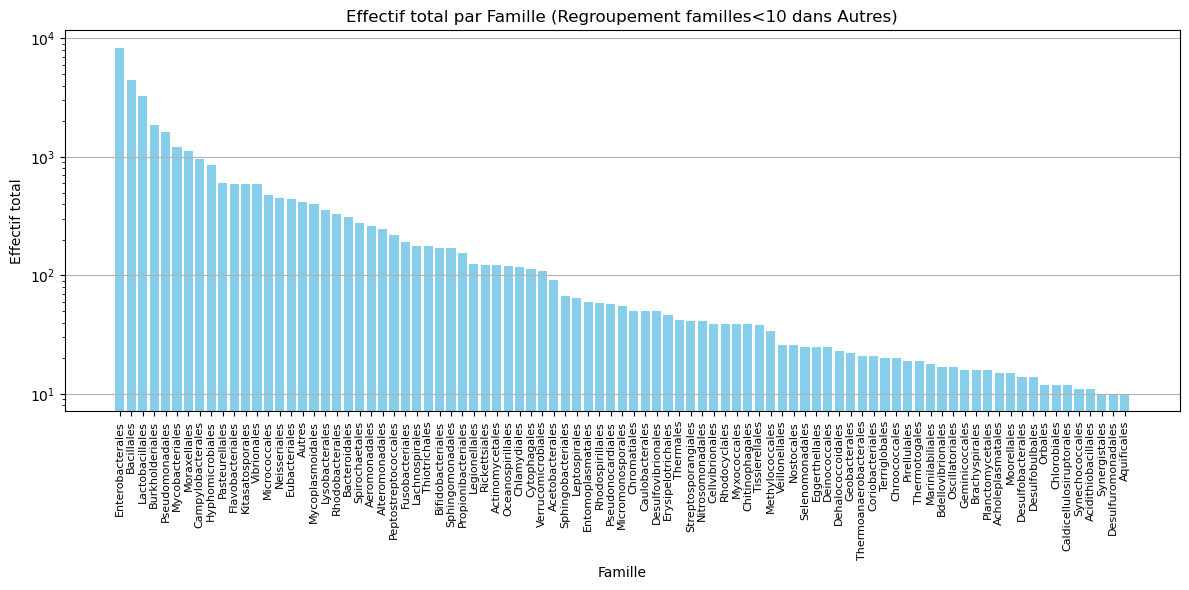

In [ ]:
threshold = 10  # Seuil d'effectif
counts_per_family["Famille_Groupée"] = counts_per_family.apply(
    lambda row: row["Famille"] if row["Effectif"] >= threshold else "Autres", axis=1
)
# Calculer les effectifs par famille ou groupe "Autres"
grouped_families = counts_per_family.groupby("Famille_Groupée")["Effectif"].sum().reset_index()
# Trier les familles par effectif décroissant
grouped_families_sorted = grouped_families.sort_values(by="Effectif", ascending=False)
# Création du graphique avec échelle semi-logarithmique
plt.figure(figsize=(12, 6))
plt.bar(grouped_families_sorted["Famille_Groupée"], grouped_families_sorted["Effectif"], color="skyblue")
plt.yscale('log')  # Appliquer une échelle log sur l'axe y
plt.xticks(rotation=90, fontsize=8)  # Rotation des labels et diminution de la taille des légendes
plt.xlabel('Famille')
plt.ylabel('Effectif total')
plt.title('Effectif total par Famille (Regroupement familles<10 dans Autres)')
plt.tight_layout()
plt.grid(axis='y')
plt.show()